# End-toEnd Decel Extraction for Demo
## Physionet Recordings LowCostCTG demo_ctg_db


## Configuration

### Select PC or Mac
usePc:
    
- True: Uses Windows Surface Pro
- False:  Uses Mac (Doug's  development Laptop)

In [1]:
usePc = False

In [2]:
if usePc:
    path = 'c:\Users\Dtree\Documents\GitHub\demo_ctg_db'
else:
    path = '/Users/doug/Documents/GitHub/demo_ctg_db'

### Should we disable sustain UC test for Physionet recordings using TocoDynometer?

reason:  Baseline drift can cause false positives?

In [3]:
disable_sustained_uc_test = True

### Should limit number of recordings to display

limit_recordings:
 - None: means no limit
 - N:  limit to N recordings, where N is an integer

In [4]:
skip_recordings = 0
limit_recordings = 10

# Imports

In [5]:
%matplotlib inline

In [6]:
import pickle
import os
from pprint import pprint
import datetime
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

from pprint import pprint
import sys

In [7]:
if usePc:
    sys.path.append('c:\Users\Dtree\Documents\GitHub\CTG\CombinedRecorder')
else:
    sys.path.append('/Users/doug/Documents/GitHub/LowCostCTG/CombinedRecorder')

In [8]:
from libLowCostCTG import selectRecordings, getRecordingsLowCostCTG
from display_recordings import displayCommon, summarizeUC
from libDecel import extractAllDecels, summarizeDecels

In [9]:
from libUC import findUC
from libFilterUC import filterArtfactsUC, PARAMS_FILTER_UC

# Config

In [10]:
from paramsDecel import FEATURE_EXTRACT_PARAMS
from display_recordings import combinedDecelColorMap

In [11]:
import warnings
warnings.filterwarnings('error')

# Code

In [12]:
def displayRecordingAll(fhr, mask, ts, uc=np.array([]), filtUC=np.array([]), tsUC=None, allUC=[],
                        sustainedUC=[],
                        allExtractorParams={}, colorMap=combinedDecelColorMap, name='',
                        plotIncr = 25, plotOverlap = 5,
                        showFull=False, showDelta=False, showVariability=False,
                        showAltBaselines=False, showIndividualDecels=False,
                        showBorderline=False):

    extractorResults = extractAllDecels(fhr, mask, ts, 
                                        allUC=allUC,
                                        allSustained=sustainedUC,
                                        allExtractorParams=FEATURE_EXTRACT_PARAMS)
    if showBorderline:
        ignore = []
    else:
        ignore = FEATURE_EXTRACT_PARAMS['allBorderline']
    
    displayCommon(extractorResults, mask, ts, uc=uc, filtUC=filtUC, tsUC=tsUC,
                  colorMap=colorMap, name=name, plotIncr=plotIncr, plotOverlap=plotOverlap,
                  showFull=showFull, showDelta=showDelta, showAltBaselines=showAltBaselines,
                  showVariability=showVariability, showIndividualDecels=showIndividualDecels,
                  ignoreArtifacts=ignore
                 )
    
    return

# Select Recorrdings

In [13]:
id_for_physionet_recordings = '0312fdfa-ef1e-42d6-ae9f-b1835ba1e04a'

In [14]:
subset_recordings, catalog = selectRecordings(path)

In [15]:
subset_recordings = [x for x in subset_recordings 
                     if x.startswith(id_for_physionet_recordings)]

# Analysis

In [16]:
if disable_sustained_uc_test:
    PARAMS_FILTER_UC['maxWidth']  = None

In [17]:
PARAMS_FILTER_UC

{'maxWidth': None,
 'minThresh': None,
 'minWidth': 35,
 'squelchFactor': 4,
 'squelchPercentile': 20}


Patient: 1
Patient:  000, Physionet_Recordings -- 0312fdfa-ef1e-42d6-ae9f-b1835ba1e04a
Comment: 

Recording - Duration: 75m   Date: 1532268243.12  1164

squelchMag: 17.79
Initial:
uc @  7.1   6.8- 8.8   width:  120 mag: 52.25
uc @ 11.5  10.4-12.2   width:  108 mag: 46.07
uc @ 13.2  12.9-23.2   width:  621 mag: 19.99
uc @ 15.6  12.9-23.3   width:  624 mag: 17.47
uc @ 17.8  12.9-23.3   width:  624 mag: 18.08
uc @ 19.1  12.9-23.3   width:  624 mag: 18.03
uc @ 20.5  12.9-23.3   width:  622 mag: 19.13
uc @ 22.3  12.9-23.3   width:  622 mag: 19.18
uc @ 24.2  23.6-35.6   width:  720 mag: 9.18
uc @ 27.0  24.8-27.5   width:  165 mag: 16.53
uc @ 32.1  30.4-34.6   width:  251 mag: 14.86
uc @ 34.0  30.4-34.6   width:  251 mag: 14.86
uc @ 36.4  36.0-36.7   width:   41 mag: 16.41
uc @ 39.5  39.1-54.0   width:  896 mag: 8.49
uc @ 44.1  43.5-44.4   width:   55 mag: 36.61
uc @ 46.5  46.2-46.8   width:   36 mag: 31.58
uc @ 50.3  49.5-53.9   width:  269 mag: 19.58
uc @ 52.1  49.4-54.0   width:  275 mag:

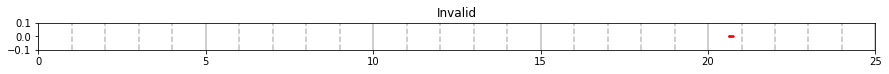

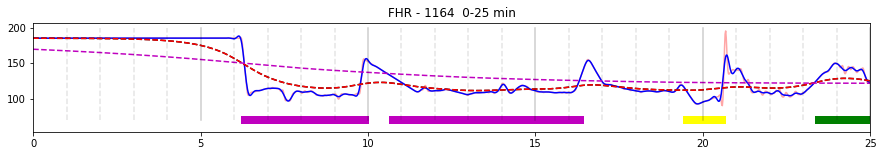

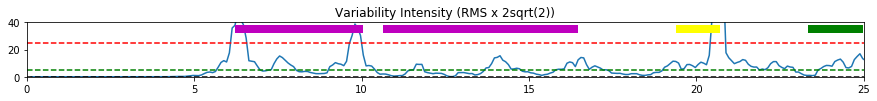

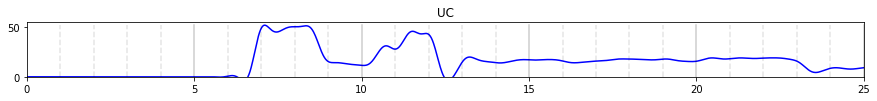

@ 9.38m : prolonged
                    47.7 bpm   dur: 215s (3.6min)   mag: 102.2 bpm   valid: 100%
                    tOnset: 183s   tRelease:  32s   span:  6.33 -  9.92 min
                    time below -15bpm: 3.5 min   time below 50% drop: 3.3 min
                    variability: 10 bpm  rms variability: 9 bpm
@15.92m : prolonged
                    28.8 bpm   dur: 335s (5.6min)   mag: 106.3 bpm   valid: 100%
                    tOnset: 310s   tRelease:  25s   span: 10.75 - 16.33 min
                    time below -15bpm: 5.1 min   time below 50% drop: 5.2 min
                    variability: 5 bpm  rms variability: 3 bpm
@19.85m : variable
                    19.6 bpm   dur:  64s (1.1min)   mag:  92.3 bpm   valid: 100%
                    tOnset:  20s   tRelease:  44s   span: 19.52 - 20.58 min
                    rms variability: 9 bpm
@23.93m : acceleration
                    22.5 bpm   dur:  84s (1.4min)   mag: 150.4 bpm   valid: 100%
                    tOnset:  28s   tRele

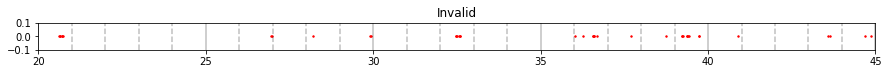

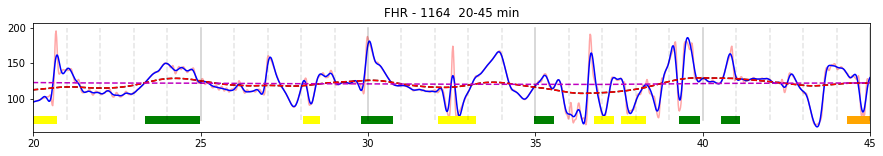

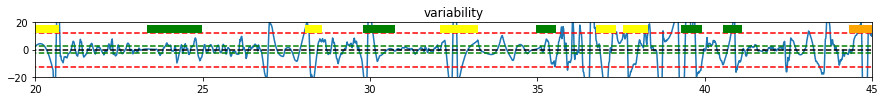

@19.85m : variable
                    19.6 bpm   dur:  64s (1.1min)   mag:  92.3 bpm   valid: 100%
                    tOnset:  20s   tRelease:  44s   span: 19.52 - 20.58 min
                    rms variability: 9 bpm
@23.93m : acceleration
                    22.5 bpm   dur:  84s (1.4min)   mag: 150.4 bpm   valid: 100%
                    tOnset:  28s   tRelease:  56s   span: 23.47 - 24.87 min
                    rms variability: 8 bpm
@28.30m : variable
                    28.5 bpm   dur:  17s (0.3min)   mag:  90.6 bpm   valid: 94%
                    tOnset:   8s   tRelease:   9s   span: 28.17 - 28.45 min
@29.98m : acceleration
                    62.1 bpm   dur:  43s (0.7min)   mag: 187.9 bpm   valid: 95%
                    tOnset:   5s   tRelease:  38s   span: 29.90 - 30.62 min
                    rms variability: 16 bpm
@32.37m : variable
                    42.3 bpm   dur:  15s (0.2min)   mag:  73.7 bpm   valid: 100%
                    tOnset:   9s   tRelease:   6s   span: 32

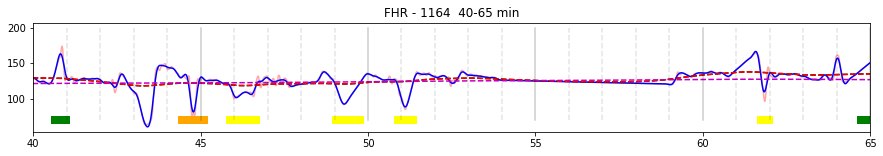

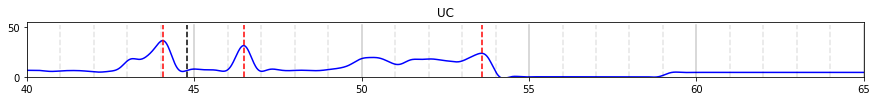

@40.87m : acceleration
                    45.6 bpm   dur:  20s (0.3min)   mag: 174.3 bpm   valid: 95%
                    tOnset:  13s   tRelease:   7s   span: 40.65 - 40.98 min
@44.78m : variable_periodic
                    26.9 bpm   dur:  40s (0.7min)   mag:  99.9 bpm   valid: 95%
                    tOnset:  21s   tRelease:  19s   span: 44.43 - 45.10 min
                    time below 70% drop: 14.0 sec
                    rms variability: 48 bpm
                    UC tAcme: 44.07m   lag:  43s
@46.07m : variable
                    19.0 bpm   dur:  47s (0.8min)   mag:  99.9 bpm   valid: 100%
                    tOnset:  11s   tRelease:  36s   span: 45.88 - 46.67 min
                    rms variability: 14 bpm
@49.28m : variable
                    29.1 bpm   dur:  43s (0.7min)   mag:  91.6 bpm   valid: 100%
                    tOnset:  15s   tRelease:  28s   span: 49.03 - 49.75 min
                    rms variability: 8 bpm
@51.12m : variable
                    39.7 bpm   dur: 

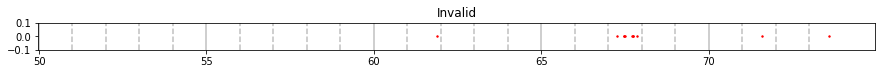

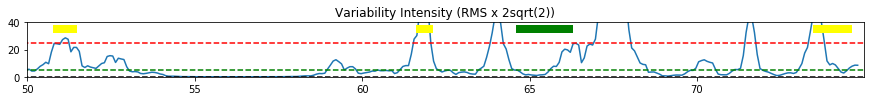

@51.12m : variable
                    39.7 bpm   dur:  28s (0.5min)   mag:  84.6 bpm   valid: 100%
                    tOnset:  14s   tRelease:  14s   span: 50.88 - 51.35 min
@61.83m : variable
                    40.7 bpm   dur:  15s (0.2min)   mag:  96.1 bpm   valid: 93%
                    tOnset:   6s   tRelease:   9s   span: 61.73 - 61.98 min
@65.07m : acceleration
                    17.4 bpm   dur:  87s (1.5min)   mag: 152.2 bpm   valid: 100%
                    tOnset:  21s   tRelease:  66s   span: 64.72 - 66.17 min
                    rms variability: 3 bpm
@73.72m : variable
                    40.6 bpm   dur:  56s (0.9min)   mag:  77.7 bpm   valid: 98%
                    tOnset:   8s   tRelease:  48s   span: 73.58 - 74.52 min
                    rms variability: 9 bpm

----------


****************************************


Patient: 2
Patient:  000, Physionet_Recordings -- 0312fdfa-ef1e-42d6-ae9f-b1835ba1e04a
Comment: 

Recording - Duration: 90m   Date: 1532268243.02  1156

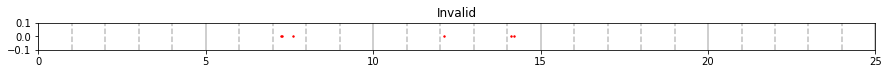

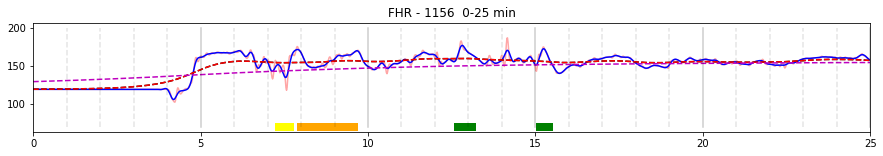

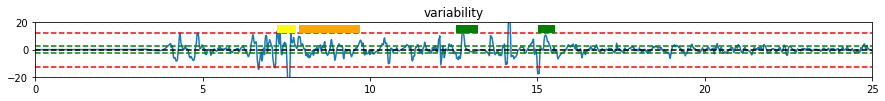

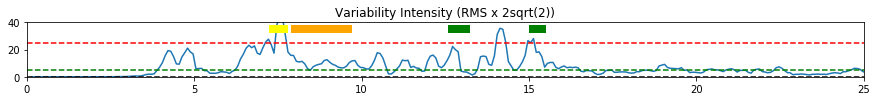

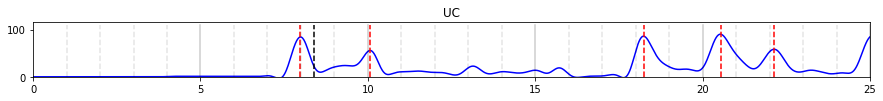

@ 7.53m : variable
                    36.3 bpm   dur:  19s (0.3min)   mag: 118.1 bpm   valid: 95%
                    tOnset:  11s   tRelease:   8s   span:  7.35 -  7.67 min
@ 8.38m : variable_periodic
                    20.6 bpm   dur:  95s (1.6min)   mag: 146.8 bpm   valid: 100%
                    tOnset:  23s   tRelease:  72s   span:  8.00 -  9.58 min
                    time below 70% drop: 32.0 sec
                    rms variability: 9 bpm
                    UC tAcme:  7.98m   lag:  24s
@12.78m : acceleration
                    23.0 bpm   dur:  25s (0.4min)   mag: 183.0 bpm   valid: 100%
                    tOnset:   5s   tRelease:  20s   span: 12.70 - 13.12 min
@15.23m : acceleration
                    19.0 bpm   dur:  16s (0.3min)   mag: 175.1 bpm   valid: 100%
                    tOnset:   6s   tRelease:  10s   span: 15.13 - 15.40 min

----------



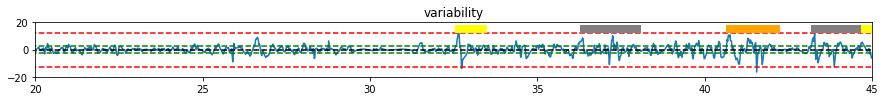

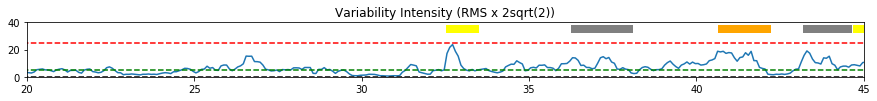

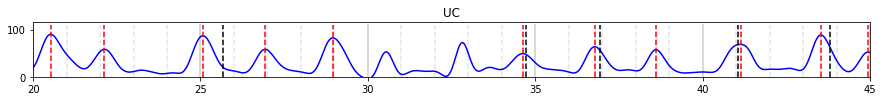

@32.82m : variable
                    21.3 bpm   dur:  44s (0.7min)   mag: 133.9 bpm   valid: 100%
                    tOnset:  10s   tRelease:  34s   span: 32.65 - 33.38 min
                    rms variability: 7 bpm
@36.93m : early_decel
                    19.6 bpm   dur:  96s (1.6min)   mag: 136.3 bpm   valid: 100%
                    tOnset:  33s   tRelease:  63s   span: 36.38 - 37.98 min
                    time below 70% drop: 35.0 sec
                    rms variability: 8 bpm
                    UC tAcme: 36.78m   lag:   9s
@41.07m : variable_periodic
                    16.0 bpm   dur:  81s (1.4min)   mag: 138.4 bpm   valid: 100%
                    tOnset:  18s   tRelease:  63s   span: 40.77 - 42.12 min
                    time below 70% drop: 24.0 sec
                    rms variability: 14 bpm
                    UC tAcme: 41.13m   lag:  -4s
@43.80m : early_decel
                    19.8 bpm   dur:  74s (1.2min)   mag: 130.9 bpm   valid: 100%
                    tOnset:  

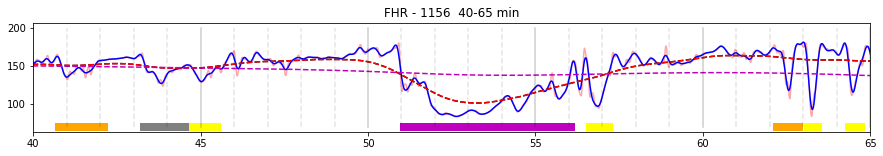

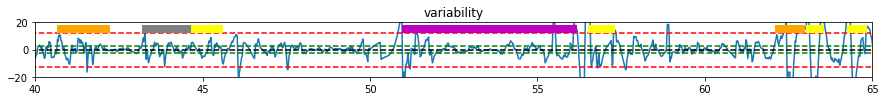

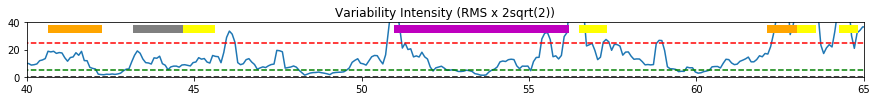

@41.07m : variable_periodic
                    16.0 bpm   dur:  81s (1.4min)   mag: 138.4 bpm   valid: 100%
                    tOnset:  18s   tRelease:  63s   span: 40.77 - 42.12 min
                    time below 70% drop: 24.0 sec
                    rms variability: 14 bpm
                    UC tAcme: 41.13m   lag:  -4s
@43.80m : early_decel
                    19.8 bpm   dur:  74s (1.2min)   mag: 130.9 bpm   valid: 100%
                    tOnset:  30s   tRelease:  44s   span: 43.30 - 44.53 min
                    time below 70% drop: 23.0 sec
                    rms variability: 10 bpm
                    UC tAcme: 43.53m   lag:  16s
@45.03m : variable
                    18.6 bpm   dur:  43s (0.7min)   mag: 129.1 bpm   valid: 100%
                    tOnset:  15s   tRelease:  28s   span: 44.78 - 45.50 min
                    rms variability: 11 bpm
@52.37m : prolonged
                    56.6 bpm   dur: 299s (5.0min)   mag:  84.6 bpm   valid: 100%
                    tOnset:  

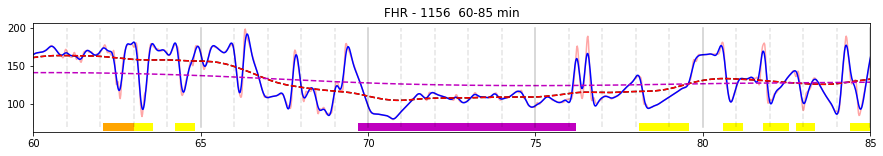

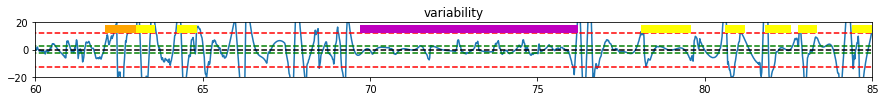

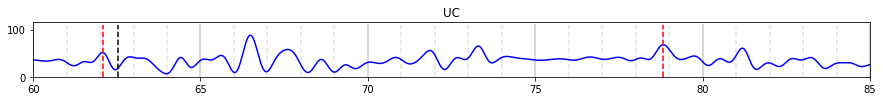

@62.55m : variable_periodic
                    39.0 bpm   dur:  40s (0.7min)   mag: 133.6 bpm   valid: 95%
                    tOnset:  20s   tRelease:  20s   span: 62.22 - 62.88 min
                    time below 70% drop: 14.0 sec
                    rms variability: 51 bpm
                    UC tAcme: 62.08m   lag:  28s
@63.27m : variable
                    74.5 bpm   dur:  19s (0.3min)   mag:  83.6 bpm   valid: 74%
                    tOnset:   8s   tRelease:  11s   span: 63.13 - 63.45 min
@64.48m : variable
                    45.8 bpm   dur:  21s (0.4min)   mag: 111.3 bpm   valid: 86%
                    tOnset:   7s   tRelease:  14s   span: 64.37 - 64.72 min
@70.70m : prolonged
                    45.3 bpm   dur: 376s (6.3min)   mag:  82.7 bpm   valid: 100%
                    tOnset:  53s   tRelease: 323s   span: 69.82 - 76.08 min
                    time below -15bpm: 5.9 min   time below 50% drop: 2.6 min
                    variability: 7 bpm  rms variability: 5 bpm
@78.3

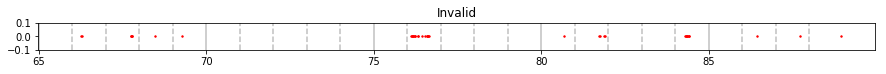

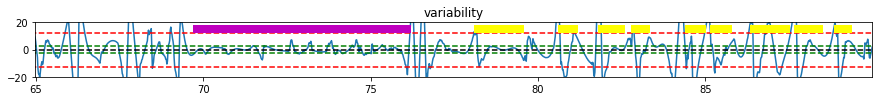

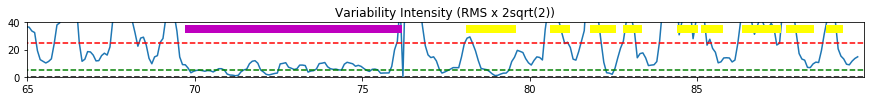

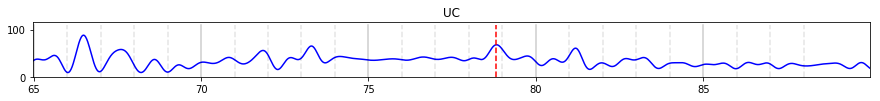

@70.70m : prolonged
                    45.3 bpm   dur: 376s (6.3min)   mag:  82.7 bpm   valid: 100%
                    tOnset:  53s   tRelease: 323s   span: 69.82 - 76.08 min
                    time below -15bpm: 5.9 min   time below 50% drop: 2.6 min
                    variability: 7 bpm  rms variability: 5 bpm
@78.38m : variable
                    22.2 bpm   dur:  75s (1.2min)   mag:  94.7 bpm   valid: 100%
                    tOnset:  10s   tRelease:  65s   span: 78.22 - 79.47 min
                    rms variability: 5 bpm
@80.83m : variable
                    30.4 bpm   dur:  22s (0.4min)   mag: 102.9 bpm   valid: 100%
                    tOnset:   7s   tRelease:  15s   span: 80.72 - 81.08 min
@82.03m : variable
                    29.3 bpm   dur:  33s (0.5min)   mag: 101.1 bpm   valid: 100%
                    tOnset:   7s   tRelease:  26s   span: 81.92 - 82.47 min
                    rms variability: 18 bpm
@83.02m : variable
                    35.4 bpm   dur:  20s (0.3min

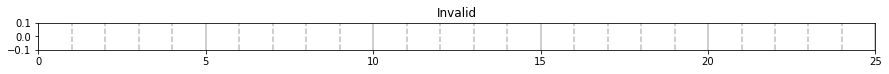

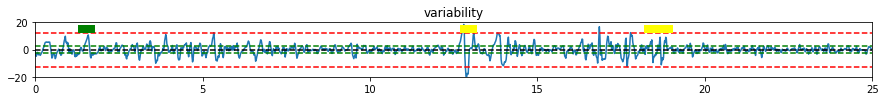

@ 1.57m : acceleration
                    16.1 bpm   dur:  16s (0.3min)   mag: 136.1 bpm   valid: 100%
                    tOnset:  10s   tRelease:   6s   span:  1.40 -  1.67 min
@12.92m : variable
                    23.6 bpm   dur:  16s (0.3min)   mag:  92.0 bpm   valid: 100%
                    tOnset:   7s   tRelease:   9s   span: 12.80 - 13.07 min
@18.53m : variable
                    16.3 bpm   dur:  37s (0.6min)   mag:  90.8 bpm   valid: 100%
                    tOnset:  14s   tRelease:  23s   span: 18.30 - 18.92 min
                    rms variability: 14 bpm

----------



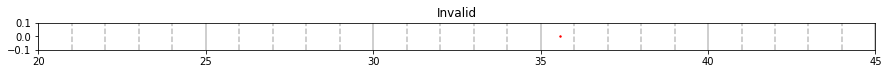

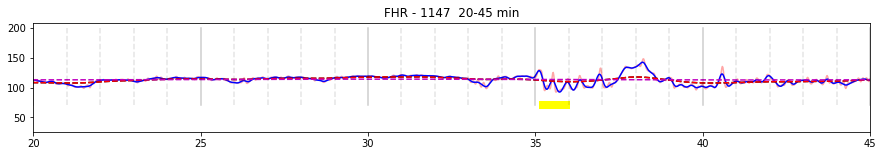

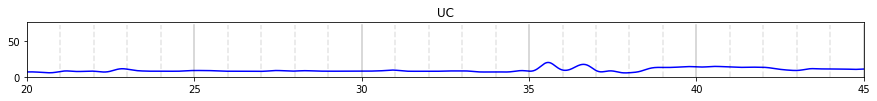

@35.33m : variable
                    16.7 bpm   dur:  16s (0.3min)   mag:  95.0 bpm   valid: 100%
                    tOnset:   7s   tRelease:   9s   span: 35.22 - 35.48 min
@35.72m : variable
                    17.3 bpm   dur:  21s (0.3min)   mag:  93.2 bpm   valid: 95%
                    tOnset:   9s   tRelease:  12s   span: 35.57 - 35.92 min

----------



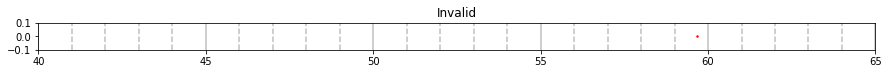

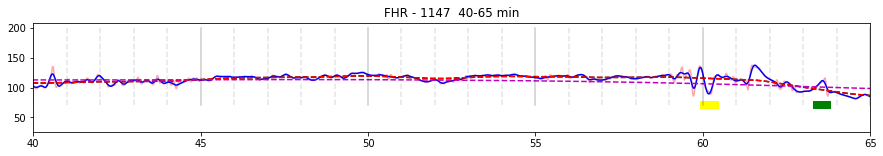

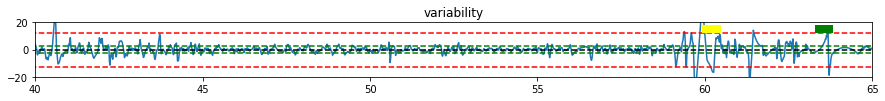

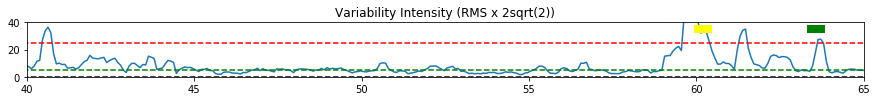

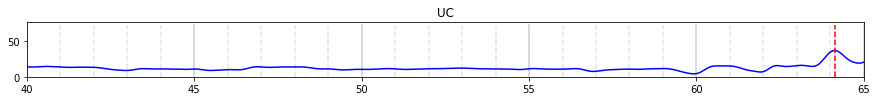

@60.18m : variable
                    26.1 bpm   dur:  19s (0.3min)   mag:  89.2 bpm   valid: 100%
                    tOnset:   9s   tRelease:  10s   span: 60.03 - 60.35 min
@63.63m : acceleration
                    19.5 bpm   dur:  18s (0.3min)   mag: 115.3 bpm   valid: 100%
                    tOnset:  13s   tRelease:   5s   span: 63.42 - 63.72 min

----------



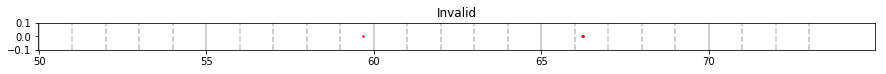

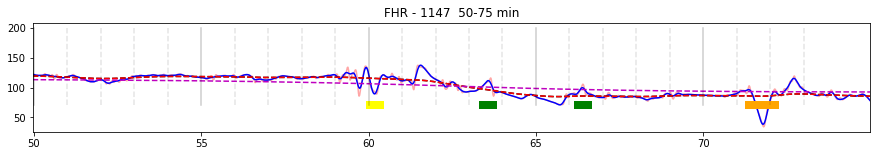

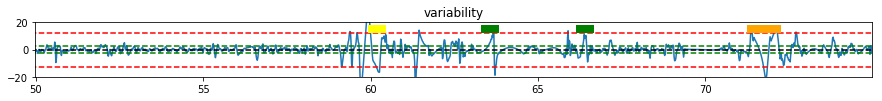

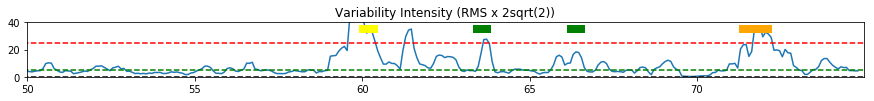

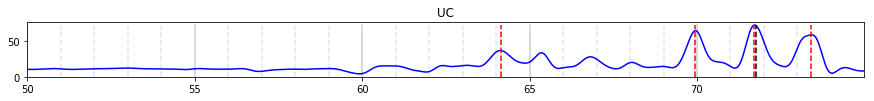

@60.18m : variable
                    26.1 bpm   dur:  19s (0.3min)   mag:  89.2 bpm   valid: 100%
                    tOnset:   9s   tRelease:  10s   span: 60.03 - 60.35 min
@63.63m : acceleration
                    19.5 bpm   dur:  18s (0.3min)   mag: 115.3 bpm   valid: 100%
                    tOnset:  13s   tRelease:   5s   span: 63.42 - 63.72 min
@66.40m : acceleration
                    19.9 bpm   dur:  18s (0.3min)   mag: 105.8 bpm   valid: 94%
                    tOnset:   9s   tRelease:   9s   span: 66.25 - 66.55 min
@71.77m : variable_periodic
                    42.4 bpm   dur:  46s (0.8min)   mag:  46.6 bpm   valid: 100%
                    tOnset:  24s   tRelease:  22s   span: 71.37 - 72.13 min
                    time below 70% drop: 17.0 sec
                    rms variability: 29 bpm
                    UC tAcme: 71.72m   lag:   3s

----------


****************************************


Patient: 4
Patient:  000, Physionet_Recordings -- 0312fdfa-ef1e-42d6-ae9f-b1835b

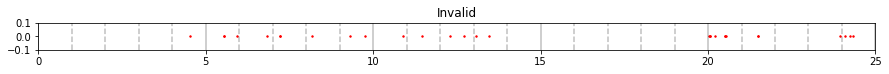

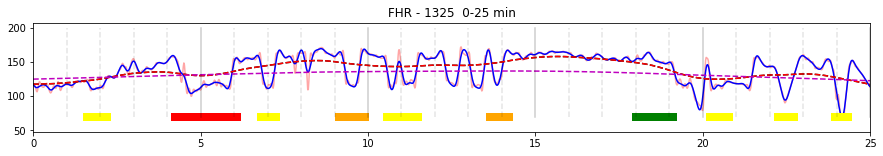

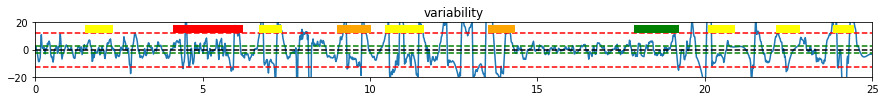

@ 1.80m : variable
                    15.2 bpm   dur:  37s (0.6min)   mag: 108.2 bpm   valid: 100%
                    tOnset:  12s   tRelease:  25s   span:  1.60 -  2.22 min
                    rms variability: 11 bpm
@ 4.78m : late_decel
                    44.9 bpm   dur: 111s (1.8min)   mag: 105.9 bpm   valid: 96%
                    tOnset:  32s   tRelease:  79s   span:  4.25 -  6.10 min
                    time below 70% drop: 61.0 sec
                    rms variability: 15 bpm
                    UC tAcme:  4.22m   lag:  34s
@ 7.02m : variable
                    34.3 bpm   dur:  26s (0.4min)   mag: 110.5 bpm   valid: 88%
                    tOnset:  12s   tRelease:  14s   span:  6.82 -  7.25 min
@ 9.53m : variable_periodic
                    46.1 bpm   dur:  47s (0.8min)   mag: 114.9 bpm   valid: 96%
                    tOnset:  24s   tRelease:  23s   span:  9.13 -  9.92 min
                    time below 70% drop: 18.0 sec
                    rms variability: 38 bpm
       

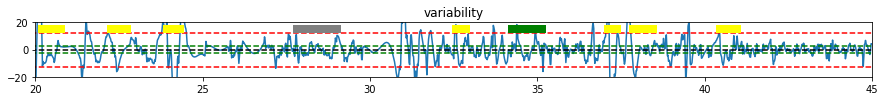

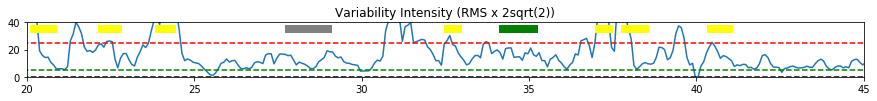

@20.33m : variable
                    17.1 bpm   dur:  34s (0.6min)   mag: 108.0 bpm   valid: 91%
                    tOnset:   7s   tRelease:  27s   span: 20.22 - 20.78 min
                    rms variability: 16 bpm
@22.47m : variable
                    41.1 bpm   dur:  29s (0.5min)   mag:  90.4 bpm   valid: 100%
                    tOnset:  13s   tRelease:  16s   span: 22.25 - 22.73 min
@24.17m : variable
                    58.1 bpm   dur:  23s (0.4min)   mag:  67.2 bpm   valid: 83%
                    tOnset:  13s   tRelease:  10s   span: 23.95 - 24.33 min
@28.63m : early_decel
                    26.2 bpm   dur:  70s (1.2min)   mag:  61.1 bpm   valid: 100%
                    tOnset:  48s   tRelease:  22s   span: 27.83 - 29.00 min
                    time below 70% drop: 21.0 sec
                    rms variability: 10 bpm
                    UC tAcme: 28.68m   lag:  -3s
@32.72m : variable
                    17.2 bpm   dur:  18s (0.3min)   mag:  98.2 bpm   valid: 100%
        

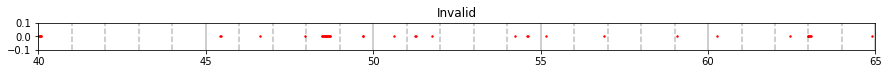

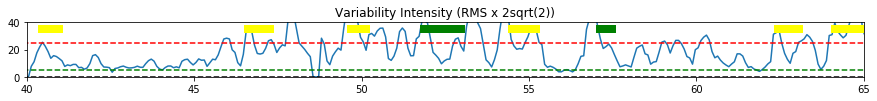

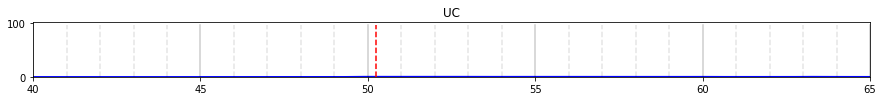

@40.65m : variable
                    20.4 bpm   dur:  31s (0.5min)   mag: 105.5 bpm   valid: 100%
                    tOnset:  12s   tRelease:  19s   span: 40.45 - 40.97 min
                    rms variability: 17 bpm
@46.75m : variable
                    25.7 bpm   dur:  40s (0.7min)   mag:  98.1 bpm   valid: 98%
                    tOnset:   9s   tRelease:  31s   span: 46.60 - 47.27 min
                    rms variability: 22 bpm
@49.83m : variable
                    44.4 bpm   dur:  26s (0.4min)   mag:  72.2 bpm   valid: 92%
                    tOnset:   9s   tRelease:  17s   span: 49.68 - 50.12 min
@51.98m : acceleration
                    23.9 bpm   dur:  37s (0.6min)   mag: 143.1 bpm   valid: 100%
                    tOnset:   8s   tRelease:  29s   span: 51.85 - 52.47 min
                    rms variability: 18 bpm
@52.82m : acceleration
                    19.4 bpm   dur:  17s (0.3min)   mag: 143.3 bpm   valid: 100%
                    tOnset:   8s   tRelease:   9s   span: 

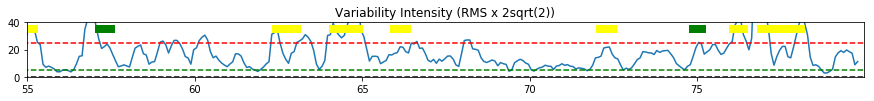

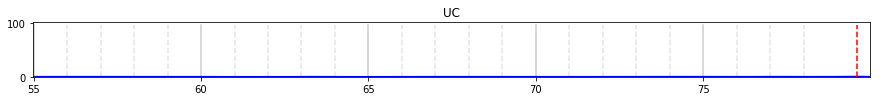

@54.80m : variable
                    54.6 bpm   dur:  43s (0.7min)   mag:  70.6 bpm   valid: 93%
                    tOnset:  19s   tRelease:  24s   span: 54.48 - 55.20 min
                    rms variability: 24 bpm
@57.35m : acceleration
                    24.2 bpm   dur:  21s (0.4min)   mag: 153.4 bpm   valid: 100%
                    tOnset:  13s   tRelease:   8s   span: 57.13 - 57.48 min
@62.60m : variable
                    26.2 bpm   dur:  38s (0.6min)   mag: 112.4 bpm   valid: 84%
                    tOnset:  10s   tRelease:  28s   span: 62.43 - 63.07 min
                    rms variability: 18 bpm
@64.38m : variable
                    39.7 bpm   dur:  46s (0.8min)   mag:  99.6 bpm   valid: 98%
                    tOnset:  15s   tRelease:  31s   span: 64.13 - 64.90 min
                    rms variability: 39 bpm
@66.15m : variable
                    18.6 bpm   dur:  24s (0.4min)   mag: 125.2 bpm   valid: 100%
                    tOnset:  12s   tRelease:  12s   span: 65.95

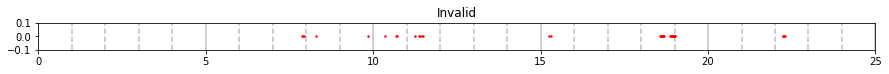

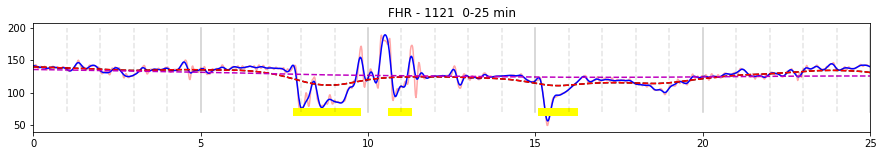

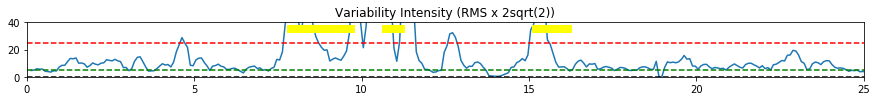

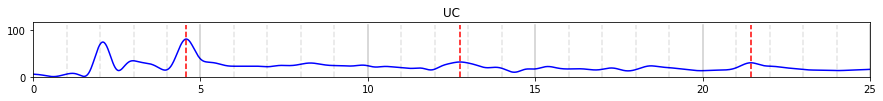

@ 8.02m : variable
                    44.6 bpm   dur:  27s (0.5min)   mag:  73.9 bpm   valid: 85%
                    tOnset:   8s   tRelease:  19s   span:  7.88 -  8.33 min
@ 8.62m : variable
                    33.5 bpm   dur:  74s (1.2min)   mag:  78.8 bpm   valid: 100%
                    tOnset:  10s   tRelease:  64s   span:  8.45 -  9.68 min
                    rms variability: 20 bpm
@10.82m : variable
                    35.8 bpm   dur:  28s (0.5min)   mag:  87.9 bpm   valid: 100%
                    tOnset:   6s   tRelease:  22s   span: 10.72 - 11.18 min
@15.37m : variable
                    62.4 bpm   dur:  57s (0.9min)   mag:  49.3 bpm   valid: 96%
                    tOnset:  10s   tRelease:  47s   span: 15.20 - 16.15 min
                    rms variability: 21 bpm

----------



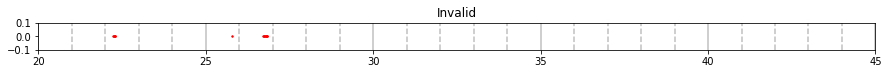

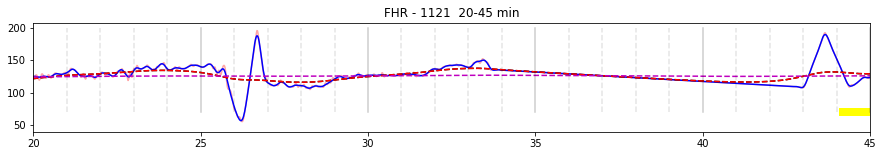

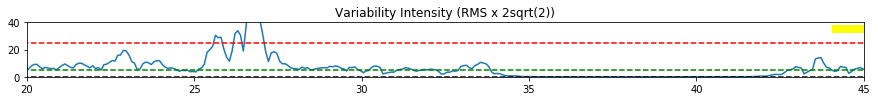

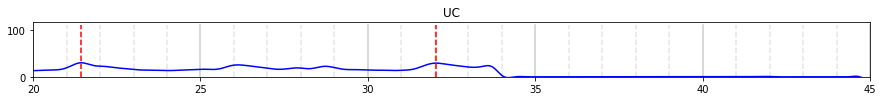

@44.42m : variable
                    21.7 bpm   dur:  69s (1.2min)   mag: 108.7 bpm   valid: 100%
                    tOnset:  14s   tRelease:  55s   span: 44.18 - 45.33 min
                    rms variability: 6 bpm

----------



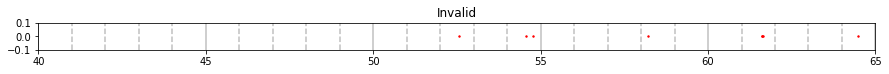

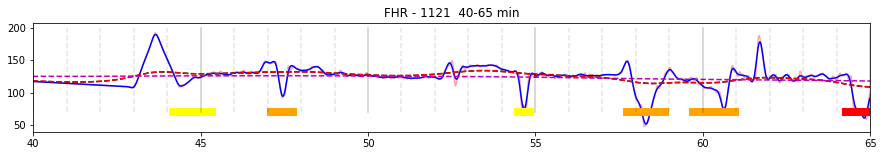

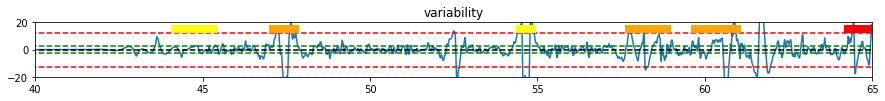

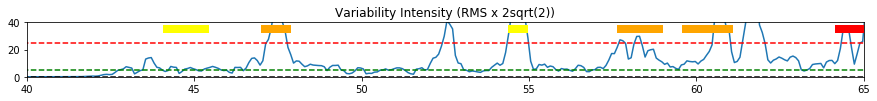

@44.42m : variable
                    21.7 bpm   dur:  69s (1.2min)   mag: 108.7 bpm   valid: 100%
                    tOnset:  14s   tRelease:  55s   span: 44.18 - 45.33 min
                    rms variability: 6 bpm
@47.47m : variable_periodic
                    28.2 bpm   dur:  39s (0.6min)   mag: 109.7 bpm   valid: 100%
                    tOnset:  21s   tRelease:  18s   span: 47.12 - 47.77 min
                    time below 70% drop: 15.0 sec
                    rms variability: 38 bpm
                    UC tAcme: 47.55m   lag:  -5s
@54.67m : variable
                    57.2 bpm   dur:  22s (0.4min)   mag:  72.3 bpm   valid: 91%
                    tOnset:  11s   tRelease:  11s   span: 54.48 - 54.85 min
@58.28m : variable_periodic
                    70.1 bpm   dur:  68s (1.1min)   mag:  58.0 bpm   valid: 99%
                    tOnset:  32s   tRelease:  36s   span: 57.75 - 58.88 min
                    time below 70% drop: 24.0 sec
                    rms variability: 20 bpm


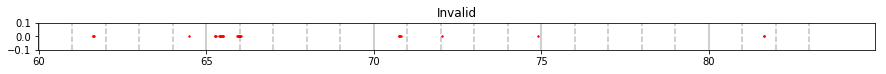

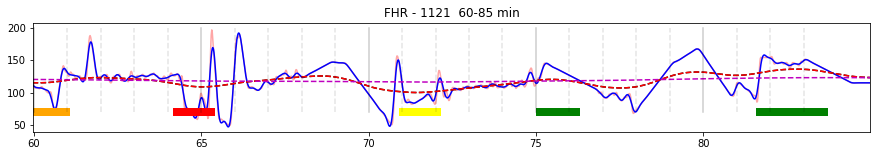

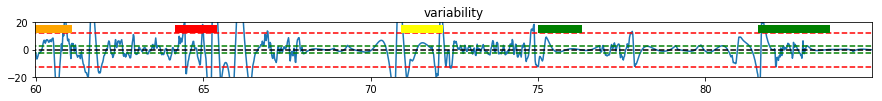

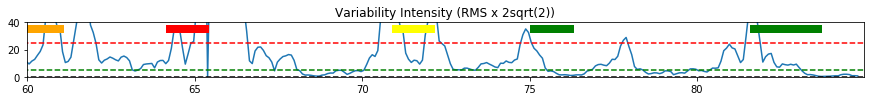

@60.58m : variable_periodic
                    33.6 bpm   dur:  76s (1.3min)   mag:  86.5 bpm   valid: 100%
                    tOnset:  53s   tRelease:  23s   span: 59.70 - 60.97 min
                    time below 70% drop: 18.0 sec
                    rms variability: 16 bpm
                    UC tAcme: 60.57m   lag:   1s
@64.82m : late_decel
                    63.4 bpm   dur:  62s (1.0min)   mag:  63.8 bpm   valid: 94%
                    tOnset:  33s   tRelease:  29s   span: 64.27 - 65.30 min
                    time below 70% drop: 28.0 sec
                    rms variability: 30 bpm
                    UC tAcme: 64.32m   lag:  30s
@71.35m : variable
                    18.1 bpm   dur:  47s (0.8min)   mag:  82.2 bpm   valid: 100%
                    tOnset:  20s   tRelease:  27s   span: 71.02 - 71.80 min
                    rms variability: 13 bpm
@71.93m : variable
                    19.8 bpm   dur:  16s (0.3min)   mag:  82.0 bpm   valid: 100%
                    tOnset:   9s

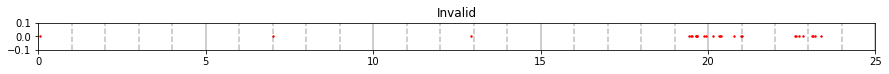

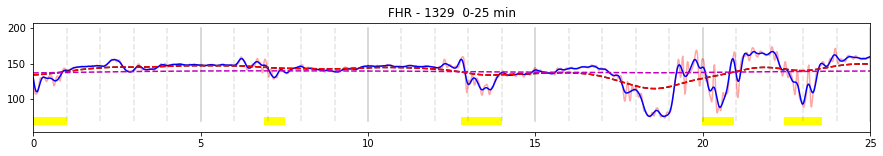

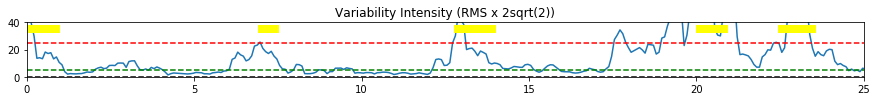

@ 0.10m : variable
                    27.1 bpm   dur:  19s (0.3min)   mag: 107.3 bpm   valid: 95%
                    tOnset:   6s   tRelease:  13s   span:  0.00 -  0.32 min
@ 0.10m : variable
                    27.1 bpm   dur:  53s (0.9min)   mag: 107.3 bpm   valid: 98%
                    tOnset:   6s   tRelease:  47s   span:  0.00 -  0.88 min
                    rms variability: 17 bpm
@ 7.20m : variable
                    16.0 bpm   dur:  23s (0.4min)   mag: 128.1 bpm   valid: 100%
                    tOnset:  11s   tRelease:  12s   span:  7.02 -  7.40 min
@13.42m : variable
                    28.8 bpm   dur:  60s (1.0min)   mag: 105.6 bpm   valid: 98%
                    tOnset:  32s   tRelease:  28s   span: 12.88 - 13.88 min
                    rms variability: 20 bpm
@20.52m : variable
                    52.5 bpm   dur:  43s (0.7min)   mag:  80.9 bpm   valid: 88%
                    tOnset:  25s   tRelease:  18s   span: 20.10 - 20.82 min
                    rms variability:

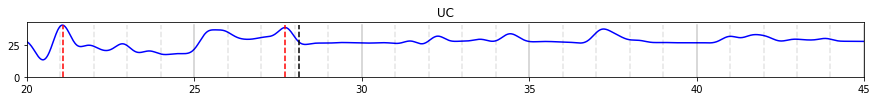

@20.52m : variable
                    52.5 bpm   dur:  43s (0.7min)   mag:  80.9 bpm   valid: 88%
                    tOnset:  25s   tRelease:  18s   span: 20.10 - 20.82 min
                    rms variability: 46 bpm
@22.98m : variable
                    51.0 bpm   dur:  54s (0.9min)   mag:  89.2 bpm   valid: 85%
                    tOnset:  26s   tRelease:  28s   span: 22.55 - 23.45 min
                    rms variability: 43 bpm
@26.40m : variable
                    28.5 bpm   dur:  45s (0.8min)   mag: 112.6 bpm   valid: 100%
                    tOnset:  25s   tRelease:  20s   span: 25.98 - 26.73 min
                    rms variability: 14 bpm
@28.13m : variable_periodic
                    24.3 bpm   dur:  98s (1.6min)   mag: 112.3 bpm   valid: 99%
                    tOnset:  24s   tRelease:  74s   span: 27.73 - 29.37 min
                    time below 70% drop: 23.0 sec
                    rms variability: 9 bpm
                    UC tAcme: 27.72m   lag:  25s
@34.93m : variab

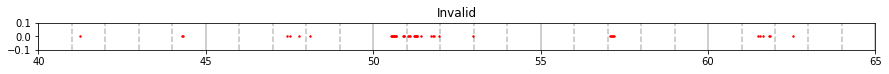

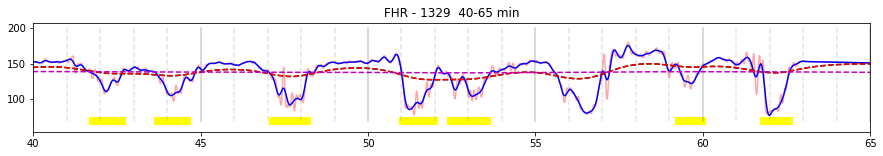

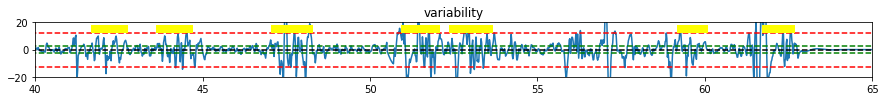

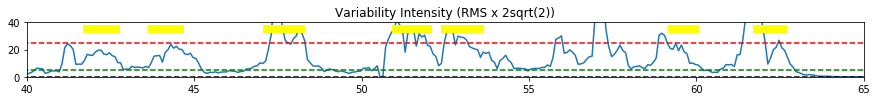

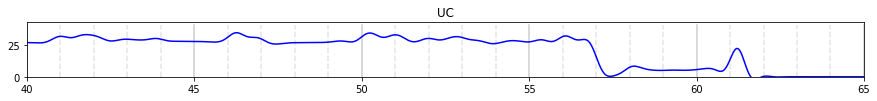

@42.18m : variable
                    29.0 bpm   dur:  52s (0.9min)   mag: 107.8 bpm   valid: 100%
                    tOnset:  23s   tRelease:  29s   span: 41.80 - 42.67 min
                    rms variability: 16 bpm
@44.12m : variable
                    35.7 bpm   dur:  51s (0.9min)   mag:  97.4 bpm   valid: 96%
                    tOnset:  23s   tRelease:  28s   span: 43.73 - 44.58 min
                    rms variability: 19 bpm
@47.67m : variable
                    42.9 bpm   dur:  61s (1.0min)   mag:  89.2 bpm   valid: 93%
                    tOnset:  30s   tRelease:  31s   span: 47.17 - 48.18 min
                    rms variability: 31 bpm
@51.25m : variable
                    42.8 bpm   dur:  57s (1.0min)   mag:  88.3 bpm   valid: 74%
                    tOnset:  13s   tRelease:  44s   span: 51.03 - 51.98 min
                    rms variability: 32 bpm
@52.60m : variable
                    26.8 bpm   dur:  16s (0.3min)   mag: 100.7 bpm   valid: 100%
                    tOn

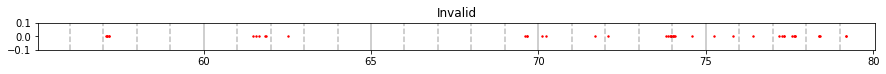

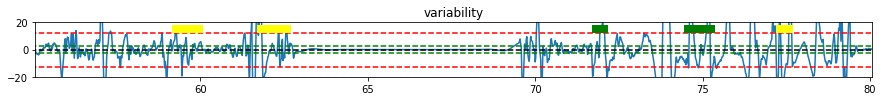

@59.67m : variable
                    30.5 bpm   dur:  41s (0.7min)   mag: 114.6 bpm   valid: 100%
                    tOnset:  23s   tRelease:  18s   span: 59.28 - 59.97 min
                    rms variability: 19 bpm
@61.98m : variable
                    58.4 bpm   dur:  46s (0.8min)   mag:  79.4 bpm   valid: 93%
                    tOnset:  10s   tRelease:  36s   span: 61.82 - 62.58 min
                    rms variability: 22 bpm
@71.97m : acceleration
                    18.3 bpm   dur:  15s (0.2min)   mag: 136.2 bpm   valid: 100%
                    tOnset:   9s   tRelease:   6s   span: 71.82 - 72.07 min
@74.98m : acceleration
                    56.9 bpm   dur:  42s (0.7min)   mag: 161.4 bpm   valid: 95%
                    tOnset:  25s   tRelease:  17s   span: 74.57 - 75.27 min
                    rms variability: 43 bpm
@77.43m : variable
                    30.2 bpm   dur:  15s (0.2min)   mag:  83.5 bpm   valid: 87%
                    tOnset:   7s   tRelease:   8s   span: 7

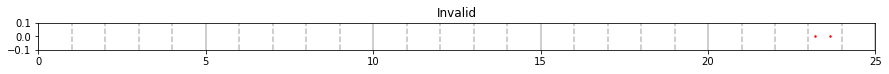

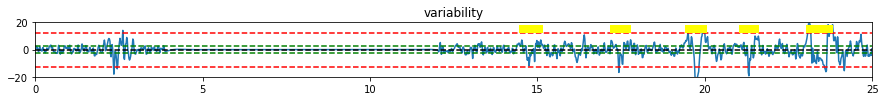

@14.77m : variable
                    18.3 bpm   dur:  28s (0.5min)   mag: 105.3 bpm   valid: 100%
                    tOnset:  12s   tRelease:  16s   span: 14.57 - 15.03 min
@17.47m : variable
                    20.0 bpm   dur:  24s (0.4min)   mag: 100.2 bpm   valid: 100%
                    tOnset:  11s   tRelease:  13s   span: 17.28 - 17.68 min
@19.75m : variable
                    46.3 bpm   dur:  25s (0.4min)   mag:  72.9 bpm   valid: 100%
                    tOnset:  13s   tRelease:  12s   span: 19.53 - 19.95 min
@21.33m : variable
                    21.3 bpm   dur:  21s (0.4min)   mag:  98.3 bpm   valid: 100%
                    tOnset:  11s   tRelease:  10s   span: 21.15 - 21.50 min
@23.48m : variable
                    52.0 bpm   dur:  34s (0.6min)   mag:  62.8 bpm   valid: 94%
                    tOnset:  20s   tRelease:  14s   span: 23.15 - 23.72 min
                    rms variability: 27 bpm

----------



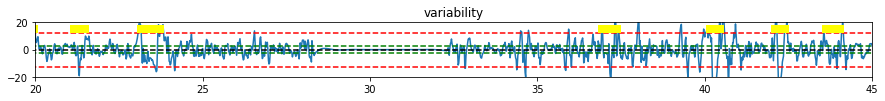

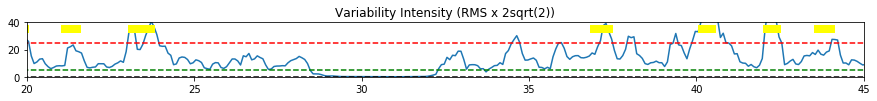

@21.33m : variable
                    21.3 bpm   dur:  21s (0.4min)   mag:  98.3 bpm   valid: 100%
                    tOnset:  11s   tRelease:  10s   span: 21.15 - 21.50 min
@23.48m : variable
                    52.0 bpm   dur:  34s (0.6min)   mag:  62.8 bpm   valid: 94%
                    tOnset:  20s   tRelease:  14s   span: 23.15 - 23.72 min
                    rms variability: 27 bpm
@37.17m : variable
                    34.1 bpm   dur:  27s (0.5min)   mag:  82.7 bpm   valid: 74%
                    tOnset:  14s   tRelease:  13s   span: 36.93 - 37.38 min
@40.30m : variable
                    39.6 bpm   dur:  18s (0.3min)   mag:  74.6 bpm   valid: 94%
                    tOnset:   8s   tRelease:  10s   span: 40.17 - 40.47 min
@42.25m : variable
                    41.0 bpm   dur:  18s (0.3min)   mag:  71.3 bpm   valid: 83%
                    tOnset:   9s   tRelease:   9s   span: 42.10 - 42.40 min
@43.82m : variable
                    16.8 bpm   dur:  25s (0.4min)   mag:  98.

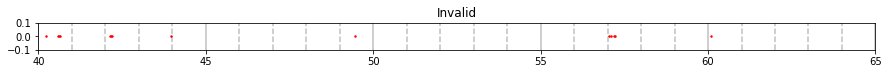

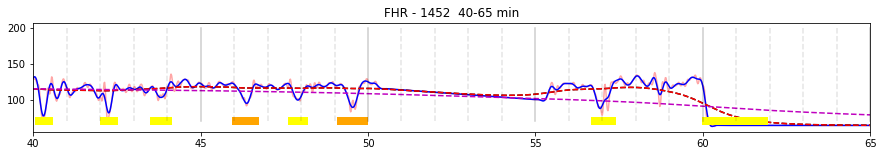

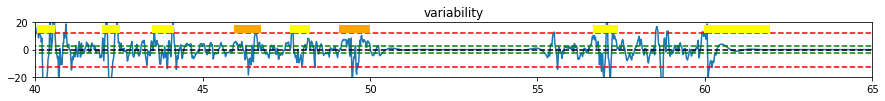

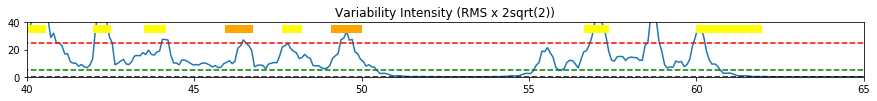

@40.30m : variable
                    39.6 bpm   dur:  18s (0.3min)   mag:  74.6 bpm   valid: 94%
                    tOnset:   8s   tRelease:  10s   span: 40.17 - 40.47 min
@42.25m : variable
                    41.0 bpm   dur:  18s (0.3min)   mag:  71.3 bpm   valid: 83%
                    tOnset:   9s   tRelease:   9s   span: 42.10 - 42.40 min
@43.82m : variable
                    16.8 bpm   dur:  25s (0.4min)   mag:  98.6 bpm   valid: 96%
                    tOnset:  12s   tRelease:  13s   span: 43.62 - 44.03 min
@46.35m : variable_periodic
                    16.6 bpm   dur:  35s (0.6min)   mag:  99.9 bpm   valid: 100%
                    tOnset:  18s   tRelease:  17s   span: 46.05 - 46.63 min
                    time below 70% drop: 15.0 sec
                    rms variability: 21 bpm
                    UC tAcme: 46.02m   lag:  20s
@47.90m : variable
                    17.8 bpm   dur:  22s (0.4min)   mag:  97.8 bpm   valid: 100%
                    tOnset:  10s   tRelease:  1

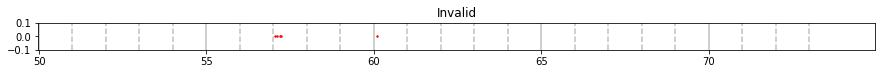

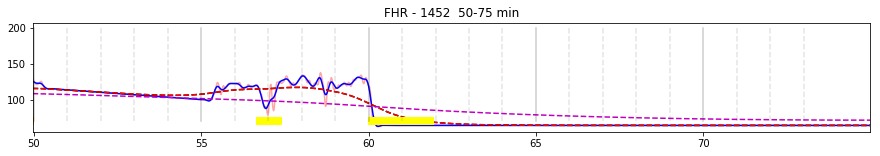

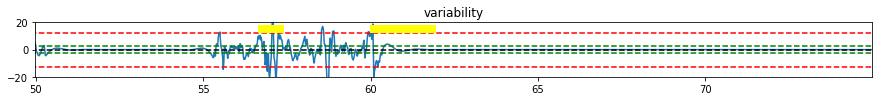

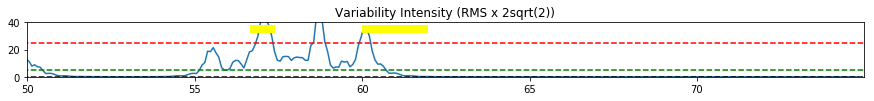

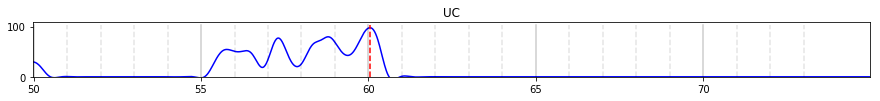

@56.93m : variable
                    36.8 bpm   dur:  31s (0.5min)   mag:  78.3 bpm   valid: 87%
                    tOnset:  10s   tRelease:  21s   span: 56.77 - 57.28 min
                    rms variability: 39 bpm
@60.28m : variable
                    24.6 bpm   dur: 104s (1.7min)   mag:  62.4 bpm   valid: 100%
                    tOnset:  11s   tRelease:  93s   span: 60.10 - 61.83 min
                    rms variability: 3 bpm

----------


****************************************


Patient: 8
Patient:  000, Physionet_Recordings -- 0312fdfa-ef1e-42d6-ae9f-b1835ba1e04a
Comment: 

Recording - Duration: 90m   Date: 1532268242.47  1028

squelchMag: 6.43
Initial:
uc @  1.1   0.0-12.1   width:  726 mag: 3.03
uc @  2.4   0.0-12.1   width:  726 mag: 3.01
uc @  3.8   0.0-12.1   width:  726 mag: 3.03
uc @  6.0   0.0-12.1   width:  726 mag: 3.03
uc @ 12.8  12.6-13.2   width:   41 mag: 77.00
uc @ 14.5  12.4-19.0   width:  396 mag: 13.82
uc @ 18.6  18.4-18.9   width:   31 mag: 52.20
uc @ 20.

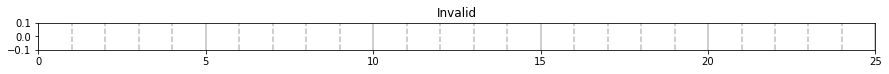

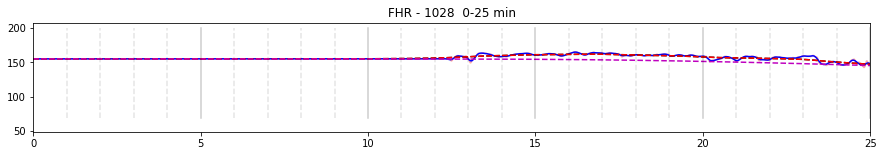

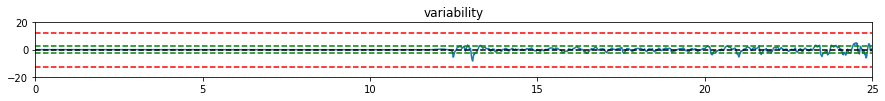

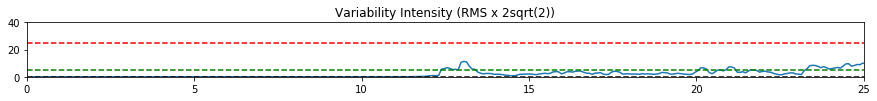


----------



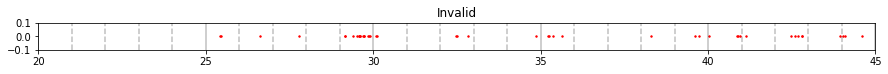

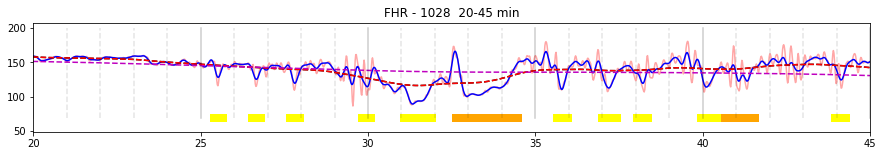

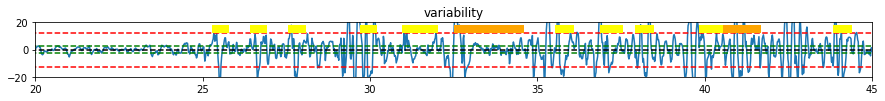

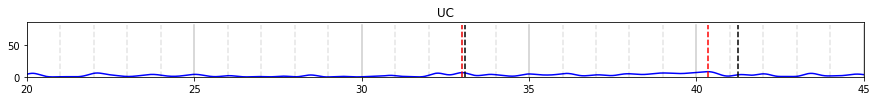

@25.53m : variable
                    29.5 bpm   dur:  17s (0.3min)   mag: 116.2 bpm   valid: 88%
                    tOnset:   8s   tRelease:   9s   span: 25.40 - 25.68 min
@26.67m : variable
                    27.4 bpm   dur:  17s (0.3min)   mag: 115.2 bpm   valid: 94%
                    tOnset:   8s   tRelease:   9s   span: 26.53 - 26.82 min
@27.82m : variable
                    30.3 bpm   dur:  18s (0.3min)   mag: 109.6 bpm   valid: 94%
                    tOnset:   8s   tRelease:  10s   span: 27.68 - 27.98 min
@29.98m : variable
                    24.9 bpm   dur:  17s (0.3min)   mag: 102.4 bpm   valid: 76%
                    tOnset:  10s   tRelease:   7s   span: 29.82 - 30.10 min
@31.33m : variable
                    28.2 bpm   dur:  49s (0.8min)   mag:  88.6 bpm   valid: 100%
                    tOnset:  15s   tRelease:  34s   span: 31.08 - 31.90 min
                    rms variability: 11 bpm
@33.08m : variable_periodic
                    49.2 bpm   dur: 110s (1.8min)   

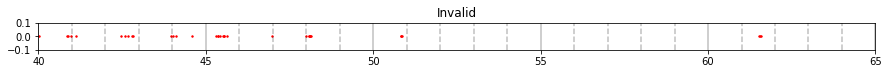

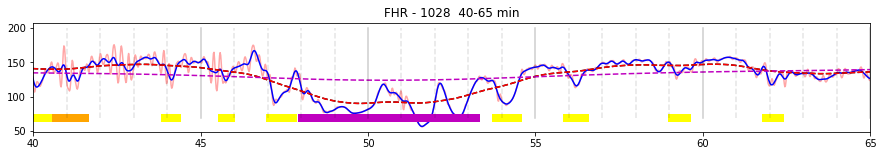

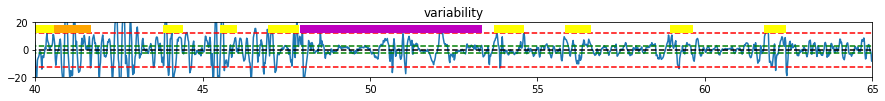

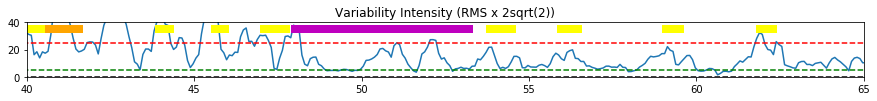

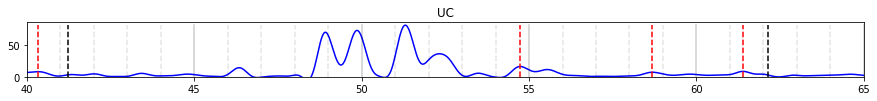

@40.10m : variable
                    33.9 bpm   dur:  29s (0.5min)   mag: 107.0 bpm   valid: 97%
                    tOnset:   9s   tRelease:  20s   span: 39.95 - 40.43 min
@41.23m : variable_periodic
                    15.4 bpm   dur:  53s (0.9min)   mag: 126.1 bpm   valid: 92%
                    tOnset:  34s   tRelease:  19s   span: 40.67 - 41.55 min
                    time below 70% drop: 19.0 sec
                    rms variability: 47 bpm
                    UC tAcme: 40.33m   lag:  54s
@44.13m : variable
                    32.7 bpm   dur:  20s (0.3min)   mag: 112.6 bpm   valid: 85%
                    tOnset:  11s   tRelease:   9s   span: 43.95 - 44.28 min
@45.77m : variable
                    17.2 bpm   dur:  17s (0.3min)   mag: 120.2 bpm   valid: 94%
                    tOnset:   8s   tRelease:   9s   span: 45.63 - 45.92 min
@47.25m : variable
                    34.0 bpm   dur:  40s (0.7min)   mag:  87.6 bpm   valid: 100%
                    tOnset:  10s   tRelease:  30

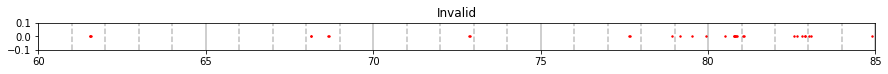

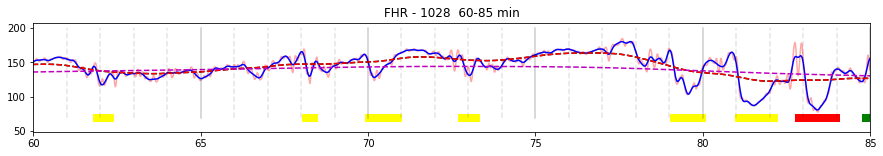

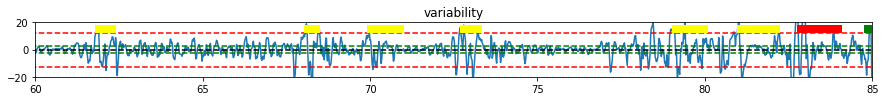

@62.07m : variable
                    21.9 bpm   dur:  24s (0.4min)   mag: 115.8 bpm   valid: 100%
                    tOnset:  10s   tRelease:  14s   span: 61.90 - 62.30 min
@68.25m : variable
                    27.9 bpm   dur:  15s (0.2min)   mag: 119.6 bpm   valid: 87%
                    tOnset:   7s   tRelease:   8s   span: 68.13 - 68.38 min
@70.18m : variable
                    27.6 bpm   dur:  52s (0.9min)   mag: 123.5 bpm   valid: 100%
                    tOnset:  10s   tRelease:  42s   span: 70.02 - 70.88 min
                    rms variability: 14 bpm
@73.03m : variable
                    30.8 bpm   dur:  24s (0.4min)   mag: 122.3 bpm   valid: 92%
                    tOnset:  13s   tRelease:  11s   span: 72.82 - 73.22 min
@79.57m : variable
                    34.9 bpm   dur:  50s (0.8min)   mag: 103.3 bpm   valid: 94%
                    tOnset:  26s   tRelease:  24s   span: 79.13 - 79.97 min
                    rms variability: 23 bpm
@81.52m : variable
                

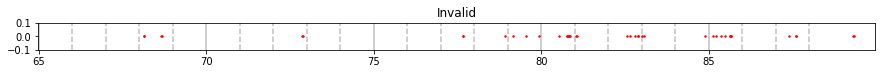

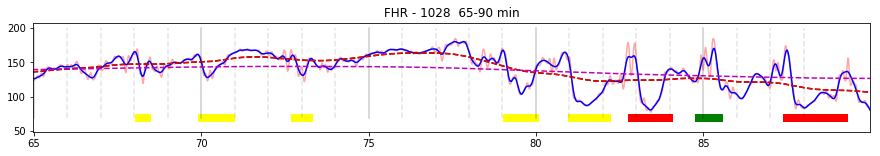

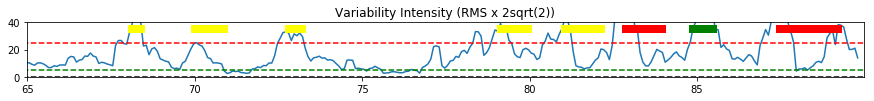

@68.25m : variable
                    27.9 bpm   dur:  15s (0.2min)   mag: 119.6 bpm   valid: 87%
                    tOnset:   7s   tRelease:   8s   span: 68.13 - 68.38 min
@70.18m : variable
                    27.6 bpm   dur:  52s (0.9min)   mag: 123.5 bpm   valid: 100%
                    tOnset:  10s   tRelease:  42s   span: 70.02 - 70.88 min
                    rms variability: 14 bpm
@73.03m : variable
                    30.8 bpm   dur:  24s (0.4min)   mag: 122.3 bpm   valid: 92%
                    tOnset:  13s   tRelease:  11s   span: 72.82 - 73.22 min
@79.57m : variable
                    34.9 bpm   dur:  50s (0.8min)   mag: 103.3 bpm   valid: 94%
                    tOnset:  26s   tRelease:  24s   span: 79.13 - 79.97 min
                    rms variability: 23 bpm
@81.52m : variable
                    37.1 bpm   dur:  64s (1.1min)   mag:  87.4 bpm   valid: 98%
                    tOnset:  27s   tRelease:  37s   span: 81.07 - 82.13 min
                    rms variability:

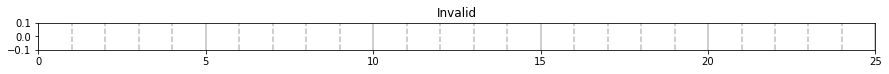


----------



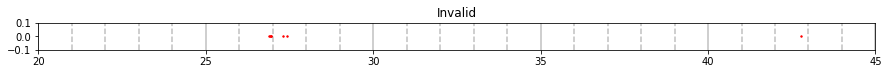

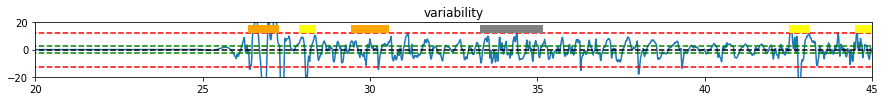

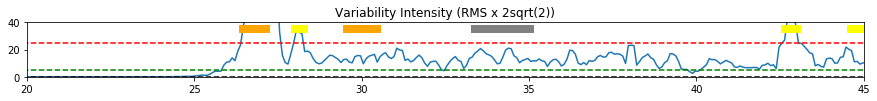

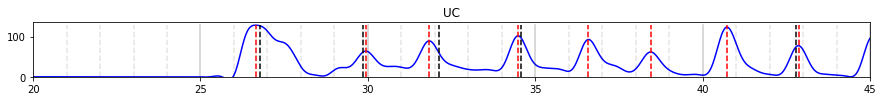

@26.78m : variable_periodic
                    36.3 bpm   dur:  41s (0.7min)   mag:  85.7 bpm   valid: 90%
                    tOnset:  19s   tRelease:  22s   span: 26.47 - 27.15 min
                    time below 70% drop: 13.0 sec
                    rms variability: 58 bpm
                    UC tAcme: 26.65m   lag:   8s
@28.13m : variable
                    22.6 bpm   dur:  16s (0.3min)   mag: 115.1 bpm   valid: 100%
                    tOnset:   8s   tRelease:   8s   span: 28.00 - 28.27 min
@29.87m : variable_periodic
                    16.2 bpm   dur:  54s (0.9min)   mag: 132.1 bpm   valid: 100%
                    tOnset:  19s   tRelease:  35s   span: 29.55 - 30.45 min
                    time below 70% drop: 20.0 sec
                    rms variability: 15 bpm
                    UC tAcme: 29.93m   lag:  -4s
@34.57m : early_decel
                    15.4 bpm   dur:  98s (1.6min)   mag: 120.1 bpm   valid: 100%
                    tOnset:  70s   tRelease:  28s   span: 33.40 - 

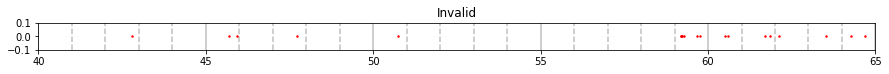

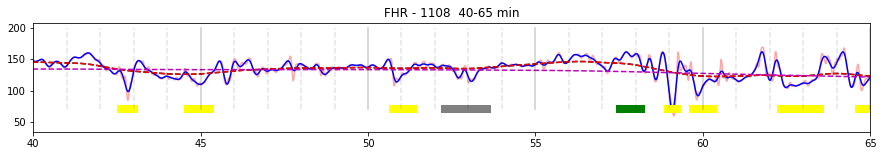

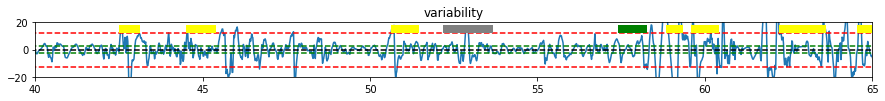

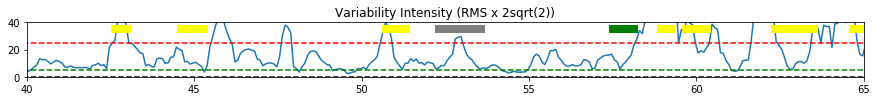

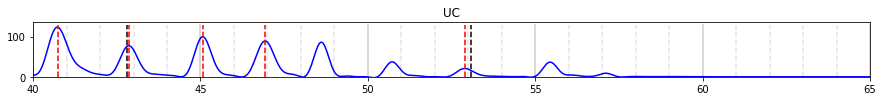

@42.83m : variable
                    47.3 bpm   dur:  22s (0.4min)   mag:  84.5 bpm   valid: 95%
                    tOnset:  12s   tRelease:  10s   span: 42.63 - 43.00 min
@44.98m : variable
                    19.3 bpm   dur:  40s (0.7min)   mag: 107.0 bpm   valid: 100%
                    tOnset:  22s   tRelease:  18s   span: 44.62 - 45.28 min
                    rms variability: 10 bpm
@50.85m : variable
                    28.1 bpm   dur:  36s (0.6min)   mag: 107.5 bpm   valid: 97%
                    tOnset:   7s   tRelease:  29s   span: 50.73 - 51.33 min
                    rms variability: 11 bpm
@53.08m : early_decel
                    15.8 bpm   dur:  76s (1.3min)   mag: 120.9 bpm   valid: 100%
                    tOnset:  47s   tRelease:  29s   span: 52.30 - 53.57 min
                    time below 70% drop: 28.0 sec
                    rms variability: 13 bpm
                    UC tAcme: 52.90m   lag:  11s
@57.70m : acceleration
                    19.4 bpm   dur:  38s 

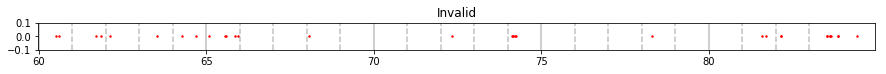

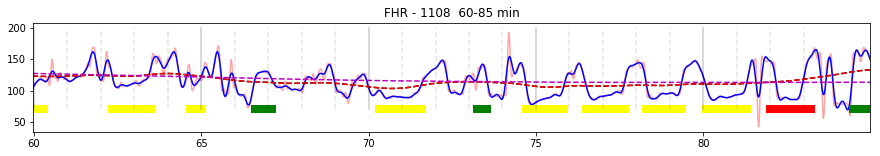

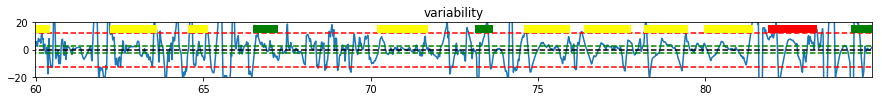

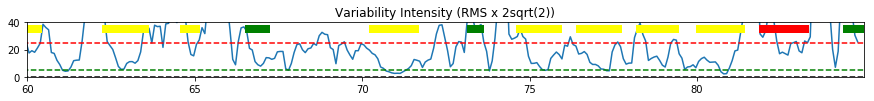

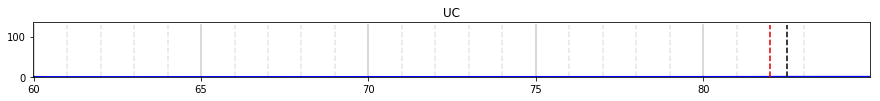

@59.85m : variable
                    38.7 bpm   dur:  37s (0.6min)   mag:  85.0 bpm   valid: 97%
                    tOnset:   9s   tRelease:  28s   span: 59.70 - 60.32 min
                    rms variability: 23 bpm
@62.48m : variable
                    20.2 bpm   dur:  70s (1.2min)   mag: 102.9 bpm   valid: 100%
                    tOnset:   9s   tRelease:  61s   span: 62.33 - 63.50 min
                    rms variability: 12 bpm
@64.80m : variable
                    24.3 bpm   dur:  22s (0.4min)   mag:  99.9 bpm   valid: 95%
                    tOnset:   8s   tRelease:  14s   span: 64.67 - 65.03 min
@66.85m : acceleration
                    18.7 bpm   dur:  30s (0.5min)   mag: 132.1 bpm   valid: 100%
                    tOnset:  14s   tRelease:  16s   span: 66.62 - 67.12 min
@70.55m : variable
                    16.8 bpm   dur:  76s (1.3min)   mag:  86.7 bpm   valid: 100%
                    tOnset:  14s   tRelease:  62s   span: 70.32 - 71.58 min
                    rms variab

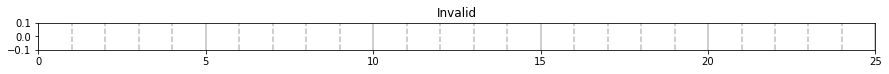

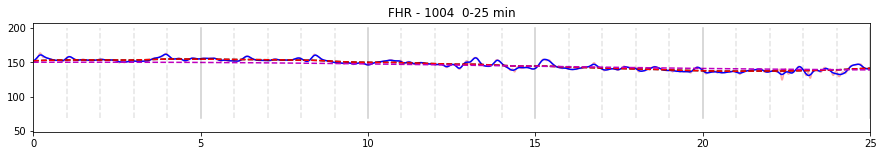

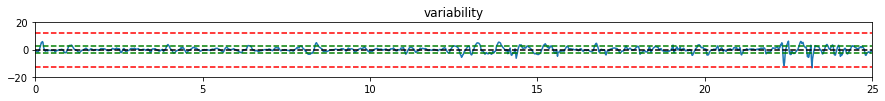

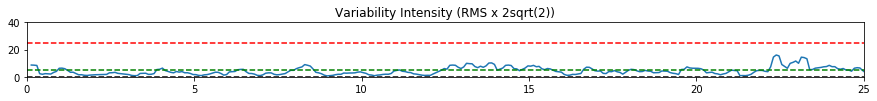

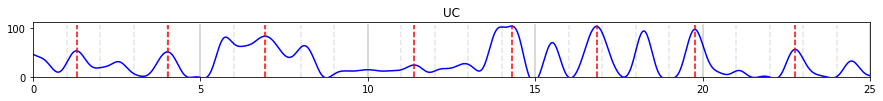


----------



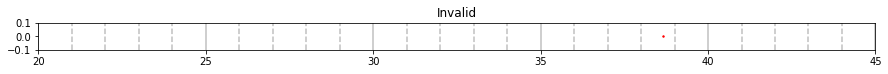

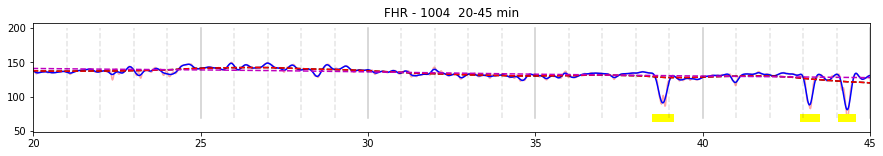

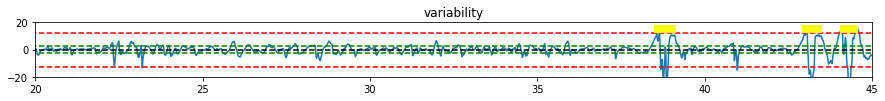

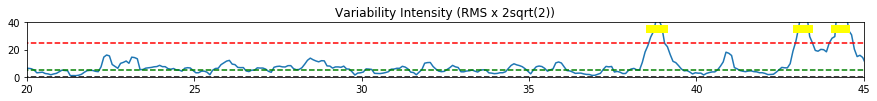

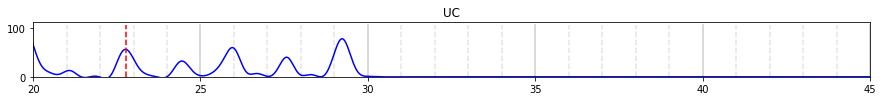

@38.80m : variable
                    41.6 bpm   dur:  25s (0.4min)   mag:  86.6 bpm   valid: 96%
                    tOnset:  12s   tRelease:  13s   span: 38.60 - 39.02 min
@43.18m : variable
                    43.0 bpm   dur:  21s (0.4min)   mag:  83.0 bpm   valid: 100%
                    tOnset:  10s   tRelease:  11s   span: 43.02 - 43.37 min
@44.32m : variable
                    54.5 bpm   dur:  19s (0.3min)   mag:  67.5 bpm   valid: 100%
                    tOnset:  10s   tRelease:   9s   span: 44.15 - 44.47 min

----------



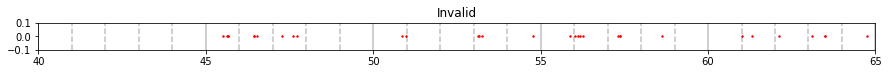

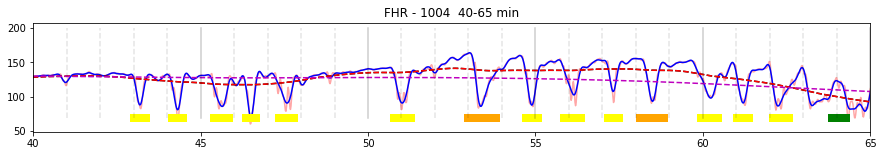

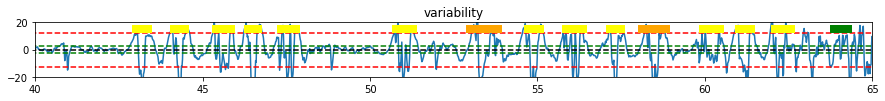

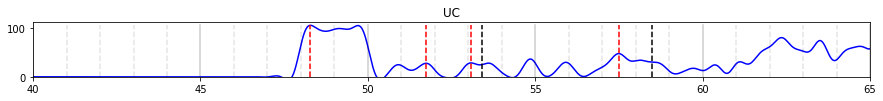

@43.18m : variable
                    43.0 bpm   dur:  21s (0.4min)   mag:  83.0 bpm   valid: 100%
                    tOnset:  10s   tRelease:  11s   span: 43.02 - 43.37 min
@44.32m : variable
                    54.5 bpm   dur:  19s (0.3min)   mag:  67.5 bpm   valid: 100%
                    tOnset:  10s   tRelease:   9s   span: 44.15 - 44.47 min
@45.65m : variable
                    32.9 bpm   dur:  26s (0.4min)   mag:  85.4 bpm   valid: 85%
                    tOnset:  15s   tRelease:  11s   span: 45.40 - 45.83 min
@46.50m : variable
                    56.9 bpm   dur:  17s (0.3min)   mag:  60.7 bpm   valid: 82%
                    tOnset:   8s   tRelease:   9s   span: 46.37 - 46.65 min
@47.58m : variable
                    41.8 bpm   dur:  27s (0.4min)   mag:  79.2 bpm   valid: 93%
                    tOnset:  15s   tRelease:  12s   span: 47.33 - 47.78 min
@51.02m : variable
                    54.0 bpm   dur:  30s (0.5min)   mag:  81.5 bpm   valid: 93%
                    tOns

@45.65m : variable
                    32.9 bpm   dur:  26s (0.4min)   mag:  85.4 bpm   valid: 85%
                    tOnset:  15s   tRelease:  11s   span: 45.40 - 45.83 min
@46.50m : variable
                    56.9 bpm   dur:  17s (0.3min)   mag:  60.7 bpm   valid: 82%
                    tOnset:   8s   tRelease:   9s   span: 46.37 - 46.65 min
@47.58m : variable
                    41.8 bpm   dur:  27s (0.4min)   mag:  79.2 bpm   valid: 93%
                    tOnset:  15s   tRelease:  12s   span: 47.33 - 47.78 min
@51.02m : variable
                    54.0 bpm   dur:  30s (0.5min)   mag:  81.5 bpm   valid: 93%
                    tOnset:  14s   tRelease:  16s   span: 50.78 - 51.28 min
@53.42m : variable_periodic
                    41.9 bpm   dur:  49s (0.8min)   mag:  94.8 bpm   valid: 94%
                    tOnset:  25s   tRelease:  24s   span: 53.00 - 53.82 min
                    time below 70% drop: 17.0 sec
                    rms variability: 32 bpm
                    UC

In [18]:
total_recordings = 0
for fhr, mask, ts, allUC, sigUC, tsUC, name in getRecordingsLowCostCTG(subset_recordings, catalog, path,
                                                                      skip=skip_recordings):

    allIdx, allUC2 = findUC(sigUC, tsUC)
    base = np.percentile(sigUC, PARAMS_FILTER_UC['squelchPercentile'])
    if PARAMS_FILTER_UC['minThresh'] is None:
        squelchMag = base * PARAMS_FILTER_UC['squelchFactor']
    else:
        squelchMag = max(PARAMS_FILTER_UC['minThresh'],
                         base * PARAMS_FILTER_UC['squelchFactor'])
    print 'squelchMag: {:0.2f}'.format(squelchMag)
    
    allUC, sustainedUC = filterArtfactsUC(sigUC, tsUC, allIdx, minMag=squelchMag, 
                                          minWidth=PARAMS_FILTER_UC['minWidth'],
                                          maxWidth=PARAMS_FILTER_UC['maxWidth'],
                                          verbose=False)
    displayRecordingAll(fhr, mask, ts, allUC=allUC, filtUC=sigUC, tsUC=tsUC,
                        sustainedUC=sustainedUC,
                        allExtractorParams=FEATURE_EXTRACT_PARAMS, 
                        name=name, plotIncr = 20, showAltBaselines=True,
                        showFull=True, 
                        showVariability=True,
                        showBorderline=False,
                        showIndividualDecels=False) 
    
    total_recordings += 1
    if limit_recordings is not None and total_recordings >= limit_recordings:
        break